# Feature Engineering for Text Representation

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

## Building a Text Corpus

In [2]:
# building a corpus of documents
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages, and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!']

labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages, and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


## Preprocessing Our Text Corpus

In [3]:
# simple text preprocessor
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lowercase and remove special characters\whitespace
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [4]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

## Traditional Feature Engineering Models

### Bag of Words Model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [6]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

(0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


In [7]:
# view output in dense matrix representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [8]:
# get all unique words in the corpus
vocab = cv.get_feature_names()

# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


### Bag of N-Grams Model

In [9]:
# can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Model

In [10]:
# Using TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [11]:
# Using TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [12]:
# Understanding the TF-IDF Model

# get unique words as feature names
unique_words = list(set([word for doc in [doc.split() for doc in norm_corpus] for word in doc]))
def_feature_dict = {w: 0 for w in unique_words}
print('Feature Names:', unique_words)
print('\nDefault Feature Dict:', def_feature_dict)

Feature Names: ['eggs', 'beans', 'lazy', 'sausages', 'today', 'quick', 'dog', 'bacon', 'fox', 'green', 'love', 'kings', 'brown', 'beautiful', 'jumps', 'blue', 'ham', 'breakfast', 'toast', 'sky']

Default Feature Dict: {'eggs': 0, 'beans': 0, 'lazy': 0, 'sausages': 0, 'today': 0, 'quick': 0, 'dog': 0, 'bacon': 0, 'fox': 0, 'green': 0, 'love': 0, 'kings': 0, 'brown': 0, 'beautiful': 0, 'jumps': 0, 'blue': 0, 'ham': 0, 'breakfast': 0, 'toast': 0, 'sky': 0}


In [13]:
from collections import Counter
# build bag of words features for each document - term frequencies
bow_features = []
for doc in norm_corpus:
    bow_feature_doc = Counter(doc.split())
    all_features = Counter(def_feature_dict)
    bow_feature_doc.update(all_features)
    bow_features.append(bow_feature_doc)

bow_features = pd.DataFrame(bow_features)
bow_features

,sky,blue,beautiful,eggs,beans,lazy,sausages,today,quick,dog,bacon,fox,green,love,kings,brown,jumps,ham,breakfast,toast
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0
3,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1
4,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0
5,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0
6,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0


In [14]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)

# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df # adding 1 to smooth idf alter

# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,sky,blue,beautiful,eggs,beans,lazy,sausages,today,quick,dog,bacon,fox,green,love,kings,brown,jumps,ham,breakfast,toast
0,4,5,4,3,2,4,3,2,4,4,3,4,2,3,2,4,2,3,2,2


In [15]:
# compute inverse document frequencies
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)

# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,sky,blue,beautiful,eggs,beans,lazy,sausages,today,quick,dog,bacon,fox,green,love,kings,brown,jumps,ham,breakfast,toast
0,1.81,1.59,1.81,2.1,2.5,1.81,2.1,2.5,1.81,1.81,2.1,1.81,2.5,2.1,2.5,1.81,2.5,2.1,2.5,2.5


In [16]:
# compute idf diagonal matrix
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()

# print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.81,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,0.00,1.59,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,0.00,0.00,1.81,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,2.1,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.0,2.5,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
5,0.00,0.00,0.00,0.0,0.0,1.81,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
6,0.00,0.00,0.00,0.0,0.0,0.00,2.1,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
7,0.00,0.00,0.00,0.0,0.0,0.00,0.0,2.5,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
8,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,1.81,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
9,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,1.81,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [17]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,sky,blue,beautiful,eggs,beans,lazy,sausages,today,quick,dog,bacon,fox,green,love,kings,brown,jumps,ham,breakfast,toast
0,1.81,1.59,1.81,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,1.81,1.59,1.81,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,2.1,0.0,0.00,0.0,0.0,0.0,0.0
2,0.00,0.00,0.00,0.0,0.0,1.81,0.0,0.0,1.81,1.81,0.0,1.81,0.0,0.0,0.0,1.81,2.5,0.0,0.0,0.0
3,0.00,0.00,0.00,2.1,2.5,0.00,2.1,0.0,0.00,0.00,2.1,0.00,0.0,0.0,2.5,0.00,0.0,2.1,2.5,2.5
4,0.00,0.00,0.00,2.1,0.0,0.00,2.1,0.0,0.00,0.00,2.1,0.00,2.5,2.1,0.0,0.00,0.0,2.1,0.0,0.0
5,0.00,1.59,0.00,0.0,0.0,1.81,0.0,0.0,1.81,1.81,0.0,1.81,0.0,0.0,0.0,1.81,0.0,0.0,0.0,0.0
6,3.62,1.59,1.81,0.0,0.0,0.00,0.0,2.5,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
7,0.00,0.00,0.00,0.0,0.0,1.81,0.0,0.0,1.81,1.81,0.0,1.81,0.0,0.0,0.0,1.81,0.0,0.0,0.0,0.0


In [18]:
from numpy.linalg import norm
# compute L2 norm
norms = norm(tfidf, axis=1)

# print norms for each document
print(np.round(norms,3))

[3.013 3.672 4.761 6.534 5.319 4.35  5.019 4.049]


In [19]:
# compute normalized tfidf
norm_tfidf = tfidf/norms[:, None]

# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,sky,blue,beautiful,eggs,beans,lazy,sausages,today,quick,dog,bacon,fox,green,love,kings,brown,jumps,ham,breakfast,toast
0,0.60,0.53,0.60,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.49,0.43,0.49,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.0,0.38,0.38,0.00,0.38,0.00,0.00,0.00,0.38,0.53,0.00,0.00,0.00
3,0.00,0.00,0.00,0.32,0.38,0.00,0.32,0.0,0.00,0.00,0.32,0.00,0.00,0.00,0.38,0.00,0.00,0.32,0.38,0.38
4,0.00,0.00,0.00,0.39,0.00,0.00,0.39,0.0,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.00
5,0.00,0.37,0.00,0.00,0.00,0.42,0.00,0.0,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.42,0.00,0.00,0.00,0.00
6,0.72,0.32,0.36,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.0,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00


In [20]:
# Extracting Features for New Documents

new_doc = 'the sky is green today'
pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2), columns=tv.get_feature_names()) # not same result as txbk?

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


In [21]:
# Document Similarity

from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


In [22]:
# Document Clustering with Similarity Features

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


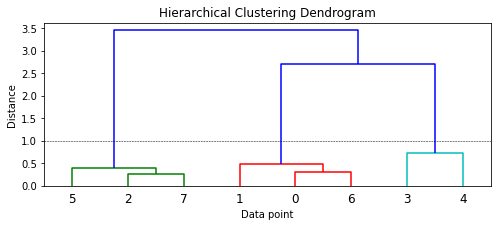

In [23]:
plt.figure(figsize=(8,3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [24]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages, and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## Topic Models

In [25]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054902,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


In [26]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('sky', 4.332439442470133), ('blue', 3.373774254787669), ('beautiful', 3.3323650509884386), ('today', 1.3325579855138987), ('love', 1.330415818217548)]

[('bacon', 2.33269586574902), ('eggs', 2.33269586574902), ('ham', 2.33269586574902), ('sausages', 2.33269586574902), ('love', 1.3354610533796558), ('beans', 1.3327735190105536), ('breakfast', 1.3327735190105536), ('kings', 1.3327735190105536), ('toast', 1.3327735190105536), ('green', 1.3325431515674175)]

[('brown', 3.3323473548404405), ('dog', 3.3323473548404405), ('fox', 3.3323473548404405), ('lazy', 3.3323473548404405), ('quick', 3.3323473548404405), ('jumps', 1.3324193772908193), ('blue', 1.2919423137963386)]



## Advanced Feature Engineering Models

In [27]:
# Loading the Bible Corpus

from nltk.corpus import gutenberg
from string import punctuation

bible = gutenberg.sents('bible-kjv.txt')
remove_terms = punctuation + '0123456789'

norm_bible = [[word.lower() for word in sent if word not in remove_terms] for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]

print('Total lines:', len(bible))
print('\nSample line:', bible[10])
print('\nProcessed line:', norm_bible[10])

Total lines: 30103

Sample line: ['1', ':', '6', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', ',', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '.']

Processed line: god said let firmament midst waters let divide waters waters


## The Continuous Bag of Words (CBOW) Model

In [28]:
# Implementing the Continuous Bag of Words (CBOW) Model

# build the corpus vocabulary
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index

# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]

vocab_size = len(word2id)
embed_size = 100
window_size = 2 # context window size

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])


Using TensorFlow backend.
Vocabulary Size: 12425
Vocabulary Sample: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10)]


In [29]:
# build a CBOW (context, target) generator

def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word = []
            start = index - window_size
            end = index + window_size + 1

            context_words.append(
                [words[i] for i in range(start, end)
                 if 0 <= i < sentence_length and i != index]
            )
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield(x,y)

# test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
        if i == 10:
            break
        i += 1

Context (X): ['old', 'testament', 'james', 'bible'] -> Target (Y): king
Context (X): ['first', 'book', 'called', 'genesis'] -> Target (Y): moses
Context (X): ['beginning', 'god', 'heaven', 'earth'] -> Target (Y): created
Context (X): ['earth', 'without', 'void', 'darkness'] -> Target (Y): form
Context (X): ['without', 'form', 'darkness', 'upon'] -> Target (Y): void
Context (X): ['form', 'void', 'upon', 'face'] -> Target (Y): darkness
Context (X): ['void', 'darkness', 'face', 'deep'] -> Target (Y): upon
Context (X): ['spirit', 'god', 'upon', 'face'] -> Target (Y): moved
Context (X): ['god', 'moved', 'face', 'waters'] -> Target (Y): upon
Context (X): ['god', 'said', 'light', 'light'] -> Target (Y): let
Context (X): ['god', 'saw', 'good', 'god'] -> Target (Y): light


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 100)            1242500   
_________________________________________________________________
lambda_1 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12425)             1254925   
Total params: 2,497,425
Trainable params: 2,497,425
Non-trainable params: 0
_________________________________________________________________
None


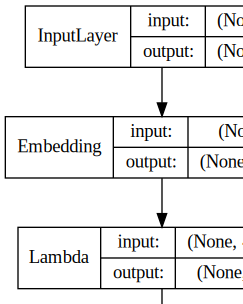

In [30]:
# build the CBOW model architecture

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size, )))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, rankdir='TB').create(prog='dot', format='svg'))

In [31]:
# Train the model
# for epoch in range(1,6):
#    loss = 0
#    i = 0
#    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
#        i += 1
#        loss += cbow.train_on_batch(x, y)
#        if i % 1000000 == 0:
#            print('Processed {} (context, word) pairs'.format(i))
#    
#    print('Epoch:', epoch, '\tLoss:', loss)
#    print()

# Note: Computationally expensive; works better if trained using a GPU. Trained on AWS p2.x instance with a Tesla K80 GPU and still took close to 1.5 hours for just five epochs!

In [32]:
# Get Word Embeddings

# weights = cbow.get_weights()[0]
# weights = weights[1:]
# print(weights.shape)

# pd.DataFrame(weights, index=list(id2word.values())[1:]).head() # doesn't look like table in book?

In [33]:
# from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
# distance_matrix = euclidean_distances(weights)
# print(distance_matrix.shape)

# view contextually similar words
# similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses', 'famine']}
# similar_words

## The Skip-Gram Model 

In [34]:
# build the corpus vocabulary
from keras.preprocessing import text

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)

word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1
embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 12425
Vocabulary Sample: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10)]


In [35]:
# Build a Skip-Gram [(target, context), relevancy] Generator

from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("{:s} ({:d}), {:s} ({:d}) -> {:d}".format(
        id2word[pairs[i][0]], pairs[i][0],
        id2word[pairs[i][1]], pairs[i][1],
        labels[i]
    ))

king (13), james (1154) -> 1
king (13), bible (5766) -> 1
james (1154), king (13) -> 1
bible (5766), overlaid (1463) -> 0
james (1154), azmaveth (3829) -> 0
bible (5766), james (1154) -> 1
bible (5766), upheld (10907) -> 0
james (1154), ittai (3825) -> 0
james (1154), bible (5766) -> 1
king (13), josias (8114) -> 0


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_4_input (InputLayer)  (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_5_input (InputLayer)  (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 100)       1242500     embedding_4_input[0][0]          
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 100)       1242500     embedding_5_input[0][0]          
____________________________________________________________________________________________

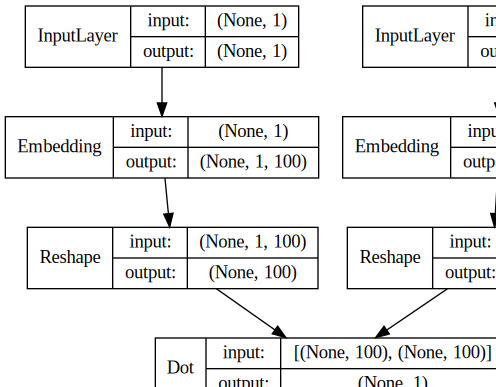

In [43]:
# Build the Skip-Gram Model Architecture

from keras.layers import Dot
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential, Model

# build skip-gram architecture
word_model = Sequential()
word_model.add(Embedding(vocab_size, embed_size, embeddings_initializer='glorot_uniform', input_length=1))
word_model.add(Reshape((embed_size, )))

context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size, embeddings_initializer='glorot_uniform', input_length=1))
context_model.add(Reshape((embed_size, )))

# NOT WORKING
model_arch = Dot(axes=1)([word_model.output, context_model.output])
model_arch = Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')(model_arch)
model = Model([word_model.input, context_model.input], model_arch)
model.compile(loss='mean_squared_error', optimizer='rmsprop')

# view model summary
print(model.summary())

# visualize model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, rankdir='TB').create(prog='dot', format='svg'))

In [44]:
# train the model
# for epoch in range(1,6):
#    loss = 0
#    for i, elem in enumerate(skip_grams):
#        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
#        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
#        labels = np.array(elem[1], dtype='int32')
#        X = [pair_first_elem, pair_second_elem]
#        Y = labels
#        if i % 10000 == 0:
#            print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
#        loss += model.train_on_batch(X, Y)
#    
#    print('Epoch:', epoch, 'Loss:', loss)

In [46]:
# get word embeddings

#word_embed_layer = model.layers[2]
#weights = word_embed_layer.get_weights()[0][1:]

#print(weights.shape)
#pd.DataFrame(weights, index=id2word.values()).head()

#from sklearn.metrics.pairwise import euclidean_distances

#distance_matrix = euclidean_distances(weights)
#print(distance_matrix.shape)

#similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1]
#                 for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses', 'famine']}

#similar_words

In [47]:
# visualize word embeddings using t-SNE (t-distributed stochastic neighbor embedding)

#from sklearn.manifold import TSNE

#word = sum([[k] + v for k, v in similar_words.items()], [])
#words_ids = [word2id[w] for w in words]
#word_vectors = np.array([weights[idx] for idx in words_ids])
#print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

#tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
#np.set_printoptions(suppress=True)
#T = tsne.fit_transform(word_vectors)
#labels = words

#plt.figure(figsize=(14,8))
#plt.scatter(T[:,1], c='steelblue', edgecolors='k')
#for label, x, y in zip(labels, T[:,0], T[:, 1]):
#    plt.annotate(label, xy=(x+1, y+1), xytext=(0,0), textcoords='offset points')

## Robust Word2Vec Models with Gensim

In [49]:
from gensim.models import word2vec

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_bible]

# set values for various parameters
feature_size = 100 # word vector dimensionality
window_context = 30 # context window size
min_word_count = 1 # minimum word count
sample = 1e-3 # downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, window=window_context, min_count=min_word_count, sample=sample, iter=50)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                 for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses', 'famine']}

similar_words


unable to import 'smart_open.gcs', disabling that module


{'god': ['lord', 'worldly', 'reasonable', 'covenant', 'goodness'],
 'jesus': ['messias', 'peter', 'apostles', 'john', 'cross'],
 'noah': ['shem', 'ham', 'japheth', 'noe', 'kenan'],
 'egypt': ['pharaoh', 'egyptians', 'bondage', 'rod', 'flowing'],
 'john': ['james', 'baptist', 'galilee', 'peter', 'devine'],
 'gospel': ['christ', 'repentance', 'hope', 'faith', 'godly'],
 'moses': ['congregation', 'children', 'aaron', 'ordinance', 'doctor'],
 'famine': ['pestilence', 'peril', 'sword', 'deaths', 'blasting']}

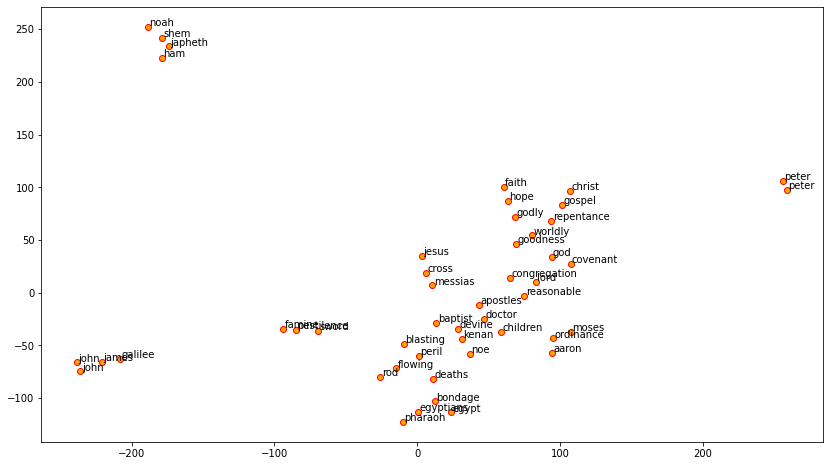

In [51]:
# visualize words of interest
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14,8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0,0), textcoords='offset points') # table doesn't look like book

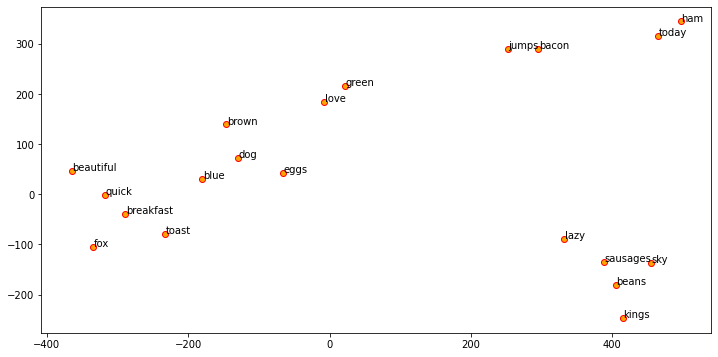

In [52]:
# applying word2vec features for machine learning tasks

# build word2vec model
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# set values for various parameters
feature_size = 10 # word vector dimensionality
window_context = 10 # context window size
min_word_count = 1 # minimum word count
sample = 1e-3

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, window=window_context, min_count=min_word_count, sample=sample, iter=100)

# visualize embeddings
from sklearn.manifold import TSNE
words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]
tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words
plt.figure(figsize=(12,6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0,0), textcoords='offset points')

In [53]:
w2v_model.wv['sky']

array([ 0.04547668, -0.04520584,  0.03588383, -0.01438262,  0.03960124,
       -0.0373336 , -0.02266555,  0.03696939, -0.00106084, -0.02799885],
      dtype=float32)